In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

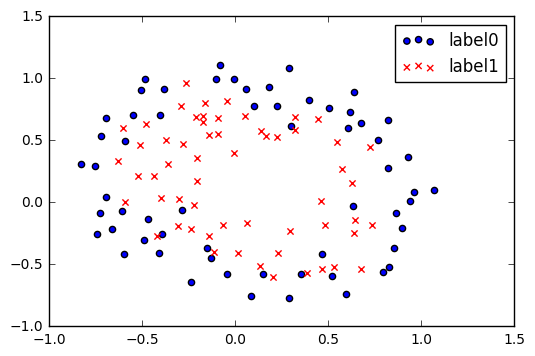

In [2]:
# 载入数据
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]
    
def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    # 切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i]==0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])

    # 画图
    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
plot()
plt.show()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.5)

In [12]:
def plot(model):
    # 获取数据值所在的范围
    x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
    y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

    # 生成网格矩阵
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
    z = z.reshape(xx.shape)
    # 等高线图
    cs = plt.contourf(xx, yy, z)

In [31]:
dtree = tree.DecisionTreeClassifier(max_depth=5,min_samples_split=4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.610169491525


C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


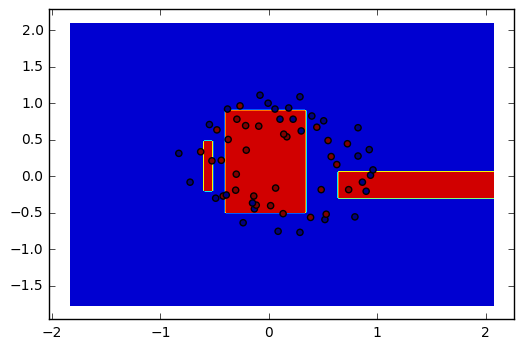

In [32]:
print(dtree.score(x_test, y_test))
plot(dtree)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.show()

In [39]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.728813559322


C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


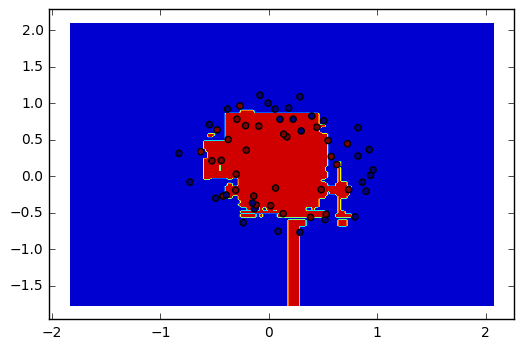

In [40]:
print(RF.score(x_test, y_test))
plot(RF)
plt.scatter(x_test[:,0],x_test[:,1],c=y_test)
plt.show()